In [65]:
import matplotlib.pyplot as plt

In [66]:
filename=r"C:\Users\Kale Ji\Downloads\UrbanSound8K\dog_bark.wav"

In [67]:
import librosa

In [68]:
import IPython.display as ipd
import librosa.display

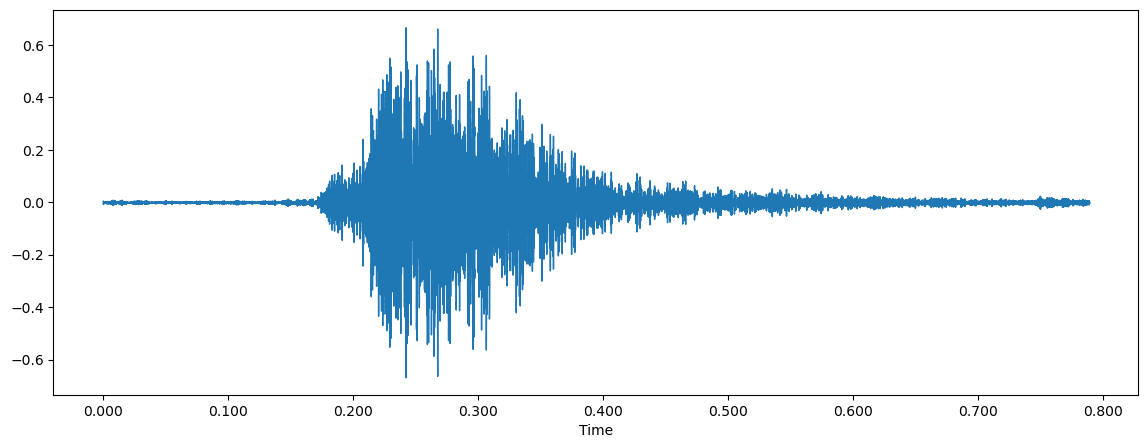

In [69]:
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

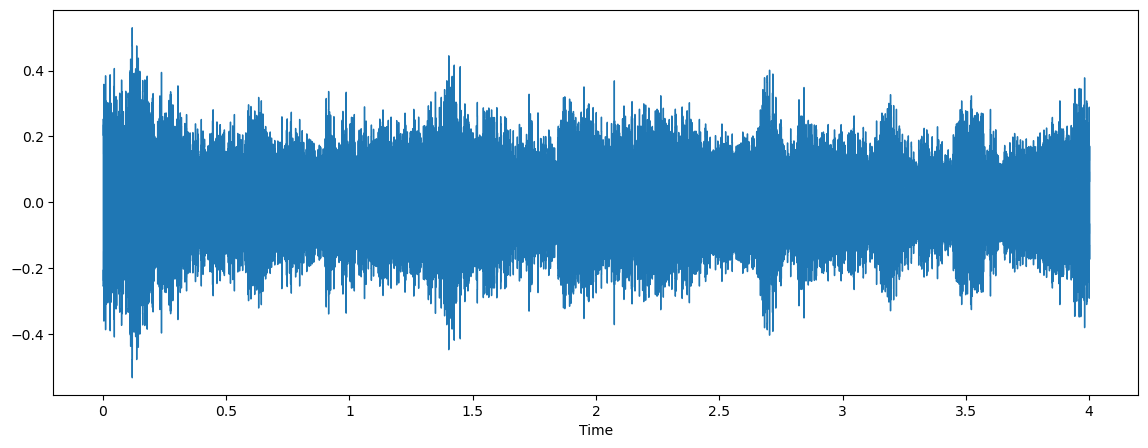

In [70]:
filename=r"C:\Users\Kale Ji\Downloads\UrbanSound8K\audio\fold2\14780-9-0-1.wav"
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)   #Gives the sound bar located just below the line

In [71]:
sample_rate    #librosa library uses 22050KZ as its sample rate while the normal sample_rate is 44100KZ which is same for all the sounds

22050

In [72]:
from scipy.io import wavfile as wav
wave_sample_rate,wave_audio=wav.read(filename)

In [73]:
wave_sample_rate   #sample rate for scipy is 44100

44100

In [74]:
wave_audio  #scipy produces non scaled number values for the given sound and has two channels

array([[-8233, -6618],
       [-4901,   159],
       [-1683,  5892],
       ...,
       [-4896, -6774],
       [-4462, -5058],
       [-2934, -2403]], dtype=int16)

In [75]:
data   #librosa produces scaled number values for the given sound and has one channel

array([-0.13191155,  0.02203283,  0.18679194, ..., -0.08500439,
       -0.10159009, -0.15459202], dtype=float32)

In [76]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Kale Ji\Downloads\UrbanSound8K\metadata\UrbanSound8K.csv")

In [77]:
df.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [78]:
df['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

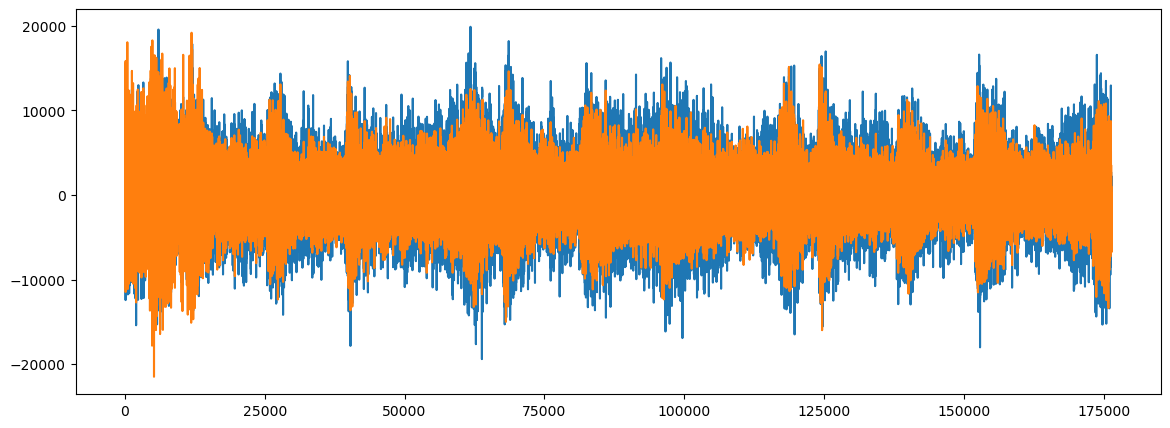

In [79]:
plt.figure(figsize=(14,5))
plt.plot(wave_audio)

Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [80]:
mfccs=librosa.feature.mfcc(y=data,sr=sample_rate,n_mfcc=40)
mfccs.shape

(40, 173)

In [81]:
mfccs

array([[-63.348286  , -38.062363  , -45.524353  , ..., -49.712685  ,
        -52.585434  , -73.74725   ],
       [ 48.27188   ,  45.798935  ,  53.463036  , ...,  69.98591   ,
         65.26688   ,  67.5276    ],
       [-40.234413  , -43.595154  , -46.73371   , ...,  -0.5345328 ,
          2.781694  ,  12.673363  ],
       ...,
       [  3.1693606 ,  -0.53068364, -10.266804  , ...,   3.2191234 ,
          1.2973224 ,   2.6305494 ],
       [  2.9762716 ,   2.2223878 ,  -4.953043  , ...,  -1.1267614 ,
         -2.4195423 ,  -2.0214303 ],
       [  7.5078735 ,  10.029094  ,   8.545518  , ...,   2.3633244 ,
         -4.026583  ,  -5.538559  ]], dtype=float32)

In [82]:
df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [83]:
def feature_extractor(filename):
    audio,sample_rate=librosa.load(filename,res_type='kaiser_fast')
    mfccs_features=librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
    mfccs_scaled_features=np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [21]:
import numpy as np
from tqdm import tqdm  #tqdm is used for fast iteration over the loop
import os
audio_dataset_path=r'UrbanSound8K/audio/'
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(df.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'\\',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=feature_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [09:17,  3.10it/s]C:\Users\Kale Ji\AppData\Roaming\Python\Python311\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8326it [22:35, 12.13it/s]C:\Users\Kale Ji\AppData\Roaming\Python\Python311\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
C:\Users\Kale Ji\AppData\Roaming\Python\Python311\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [23:35,  6.17it/s]


In [29]:
"C:\Users\Kale Ji\Downloads\UrbanSound8K\audio\fold5\6508-9-0-4.wav"

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (759948629.py, line 1)

In [84]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.52066, 52.00812, -...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402214, 60.302044,...",children_playing


In [85]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [86]:
X[0]

array([-217.35526   ,   70.22338   , -130.38527   ,  -53.282898  ,
        -21.19913   ,  -22.677622  ,  -10.85597   ,   18.294254  ,
          6.652703  ,   14.324025  ,  -12.167682  ,    2.276837  ,
        -17.779188  ,   10.388951  ,   -6.5828357 ,   -0.69445693,
        -18.336023  ,    1.9942534 ,   -5.143332  ,    8.3024    ,
        -12.645056  ,   -6.529732  ,    4.6176677 ,   -2.1799166 ,
         -6.662824  ,    0.35971075,   -3.9084098 ,    4.7756243 ,
         -6.384521  ,   -5.379818  ,    0.9159783 ,    6.9704943 ,
         -0.248668  ,    1.6782187 ,   -5.611182  ,   -2.9643466 ,
          3.1490574 ,   -1.693053  ,   -0.61698383,    0.3860054 ],
      dtype=float32)

In [87]:
X.shape

(8732, 40)

In [88]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [28]:
y=np.array(pd.get_dummies(y))

In [90]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [91]:
y.shape

(8732, 10)

In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [93]:
X_train.shape

(6985, 40)

In [94]:
X_train[0]

array([-212.0088   ,   39.79902  ,  -25.464056 ,   11.537271 ,
          6.0975065,   32.386436 ,  -25.580656 ,   27.226223 ,
         -1.8814669,    6.847662 ,   -5.471979 ,   10.552528 ,
         -5.4009666,   11.151644 ,   -5.0856433,    8.60033  ,
        -15.518004 ,   12.302557 ,   -7.1684713,   10.458544 ,
         -8.49603  ,    5.9112716,   -3.3224368,    3.8189828,
         -4.55402  ,    2.5215938,  -10.29268  ,    6.018108 ,
         -9.156543 ,    5.81428  ,   -6.3982596,    6.229372 ,
         -2.8776188,    1.1409656,   -0.6904647,    1.8022578,
         -1.33399  ,    1.3876954,   -3.8249745,    2.1662393],
      dtype=float32)

In [95]:
y_train[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [96]:
y_train.shape

(6985, 10)

Model Creation

In [97]:
import tensorflow as tf

In [98]:
from tensorflow import keras

In [99]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(40,),activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(200,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation='sigmoid')
])

C:\Users\Kale Ji\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [100]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [101]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 100)                 │           4,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,410 (177.38 KB)

 Trainable params: 45,410 (177.38 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6781 - loss: 0.9753
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6774 - loss: 0.9515
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6853 - loss: 0.9390
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6782 - loss: 0.9637
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6815 - loss: 0.9661
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6761 - loss: 0.9676
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6669 - loss: 0.9838
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6797 - loss: 0.9468
Epoch 9/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6792 - loss: 0.9668
Epoch 10/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6813 - loss: 0.9589
Epoch 11/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6880 - loss: 0.9301
Epoch 12/100
219/219 ━━━━━━━━━━━━━━━━━━━━

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7087 - loss: 0.8834
Epoch 69/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7036 - loss: 0.8797
Epoch 70/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7069 - loss: 0.8768
Epoch 71/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7113 - loss: 0.8732
Epoch 72/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7058 - loss: 0.8706
Epoch 73/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6977 - loss: 0.9055
Epoch 74/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7034 - loss: 0.8918
Epoch 75/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7035 - loss: 0.9060
Epoch 76/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7106 - loss: 0.8763
Epoch 77/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7050 - loss: 0.9052
Epoch 78/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7167 - loss: 0.8727
Epoch 79/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 

In [103]:
model.evaluate(X_test,y_test)[1]

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7640 - loss: 0.7383


0.7635947465896606

In [52]:
model.predict(X_test)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[2.2452592e-11, 6.7452855e-02, 8.3058596e-01, ..., 8.6495206e-25,
        9.4629800e-01, 7.1449912e-01],
       [1.5498593e-01, 7.7620350e-02, 8.6821795e-01, ..., 3.9092381e-03,
        3.6132476e-01, 5.8947283e-01],
       [9.5800227e-01, 8.3851904e-02, 6.4938951e-01, ..., 5.0011948e-02,
        5.7699408e-02, 6.3310540e-01],
       ...,
       [1.1962219e-01, 1.5897532e-01, 4.1532546e-01, ..., 2.0857733e-02,
        7.8671646e-01, 5.9554958e-01],
       [1.8406179e-12, 4.1544769e-02, 2.4422170e-01, ..., 7.0091969e-06,
        6.1485412e-06, 9.3016678e-01],
       [1.4613210e-12, 1.0000000e+00, 4.8672603e-03, ..., 5.1131220e-21,
        1.7398230e-06, 1.0000000e+00]], dtype=float32)

In [89]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=keras.utils.to_categorical(le.fit_transform(y))

In [59]:
predictions = np.argmax(model.predict(X_test), axis=-1)

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [62]:
predictions

array([3, 3, 0, ..., 8, 4, 1], dtype=int64)

In [102]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.keras', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
217/219 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1068 - loss: 24.9481
Epoch 1: val_loss improved from inf to 2.29491, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1069 - loss: 24.7744 - val_accuracy: 0.1105 - val_loss: 2.2949
Epoch 2/100
215/219 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1221 - loss: 2.8076
Epoch 2: val_loss improved from 2.29491 to 2.28335, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1220 - loss: 2.8031 - val_accuracy: 0.1059 - val_loss: 2.2833
Epoch 3/100
206/219 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1270 - loss: 2.3791
Epoch 3: val_loss improved from 2.28335 to 2.27052, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1272 - loss: 2.3772 - val_accuracy: 0.1139 - val_loss: 2.2705
Epoch 4/100
206/219 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3979 - loss: 1.6933 - val_accuracy: 0.5077 - val_loss: 1.4537
Epoch 23/100
210/219 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4506 - loss: 1.5841
Epoch 23: val_loss improved from 1.45373 to 1.40882, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4500 - loss: 1.5845 - val_accuracy: 0.5100 - val_loss: 1.4088
Epoch 24/100
208/219 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4587 - loss: 1.5454
Epoch 24: val_loss improved from 1.40882 to 1.38780, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4583 - loss: 1.5464 - val_accuracy: 0.5169 - val_loss: 1.3878
Epoch 25/100
213/219 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4612 - loss: 1.5681
Epoch 25: val_loss improved from 1.38780 to 1.32889, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.461

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5945 - loss: 1.1987 - val_accuracy: 0.6863 - val_loss: 0.9948
Epoch 45/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6013 - loss: 1.1861
Epoch 45: val_loss did not improve from 0.97651
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6013 - loss: 1.1861 - val_accuracy: 0.6634 - val_loss: 1.0114
Epoch 46/100
216/219 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5912 - loss: 1.1960
Epoch 46: val_loss improved from 0.97651 to 0.96311, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5912 - loss: 1.1960 - val_accuracy: 0.6846 - val_loss: 0.9631
Epoch 47/100
216/219 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6041 - loss: 1.1676
Epoch 47: val_loss did not improve from 0.96311
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6041 - loss: 1.1675 - val_accuracy: 0.6754 - val_loss: 0.9752
Epoch 48/100
209/219 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accurac

210/219 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6533 - loss: 1.0535
Epoch 68: val_loss improved from 0.83519 to 0.83256, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6535 - loss: 1.0530 - val_accuracy: 0.7384 - val_loss: 0.8326
Epoch 69/100
210/219 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6559 - loss: 1.0448
Epoch 69: val_loss did not improve from 0.83256
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6558 - loss: 1.0445 - val_accuracy: 0.7293 - val_loss: 0.8350
Epoch 70/100
210/219 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6390 - loss: 1.0905
Epoch 70: val_loss did not improve from 0.83256
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6395 - loss: 1.0888 - val_accuracy: 0.7396 - val_loss: 0.8375
Epoch 71/100
210/219 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6564 - loss: 1.0354
Epoch 71: val_loss improved from 0.83256 to 0.82641, saving model to saved_models/audio_classification.ke

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6685 - loss: 0.9943 - val_accuracy: 0.7430 - val_loss: 0.7843
Epoch 92/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6858 - loss: 0.9384
Epoch 92: val_loss did not improve from 0.76163
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6857 - loss: 0.9389 - val_accuracy: 0.7510 - val_loss: 0.7700
Epoch 93/100
214/219 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6889 - loss: 0.9496
Epoch 93: val_loss did not improve from 0.76163
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6887 - loss: 0.9502 - val_accuracy: 0.7401 - val_loss: 0.8005
Epoch 94/100
213/219 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6709 - loss: 0.9722
Epoch 94: val_loss did not improve from 0.76163
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6710 - loss: 0.9727 - val_accuracy: 0.7521 - val_loss: 0.7791
Epoch 95/100
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6838 - loss: 0.9471
Epoch 95: val_loss did not improve f

In [109]:
filename=r"C:\Users\Kale Ji\Downloads\UrbanSound8K\audio\fold5\17578-5-0-0.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=np.argmax(model.predict(mfccs_scaled_features),axis=-1)
print(predicted_label)
prediction_class = le.inverse_transform(predicted_label) 
prediction_class

[-62.18189     88.424644    19.698347    49.752777   -11.535681
  34.223465    -1.0182724   16.658773     4.5504956   17.257061
 -13.111235    17.833494    -9.725922    13.313392    -5.576143
  10.75904     -4.594287     9.109176    -6.3939905    6.1782885
  -7.449317     5.9449196   -9.991046     4.3708205   -2.5317645
   3.6196642   -3.1933298    5.4042835   -7.1689935    8.535562
  -6.7585387    4.311569     1.7756363    2.73927      3.2648919
   3.535518     0.17106146   6.20712     -1.9687158   -0.53543794]
[[-62.18189     88.424644    19.698347    49.752777   -11.535681
   34.223465    -1.0182724   16.658773     4.5504956   17.257061
  -13.111235    17.833494    -9.725922    13.313392    -5.576143
   10.75904     -4.594287     9.109176    -6.3939905    6.1782885
   -7.449317     5.9449196   -9.991046     4.3708205   -2.5317645
    3.6196642   -3.1933298    5.4042835   -7.1689935    8.535562
   -6.7585387    4.311569     1.7756363    2.73927      3.2648919
    3.535518     0.17106

array(['engine_idling'], dtype='<U16')